# ANALYSIS & PREDICTION OF JOB TERMINATION

## ***Importing necesssary packages for the analysis***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## loading and reading data from the file
df=pd.read_csv('emp.csv')
df

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES


In [3]:
df.STATUS.value_counts()

ACTIVE        48168
TERMINATED     1485
Name: STATUS, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

In [5]:
df.STATUS.unique()

array(['ACTIVE', 'TERMINATED'], dtype=object)

In [6]:
df.isnull().sum()

EmployeeID             0
recorddate_key         0
birthdate_key          0
orighiredate_key       0
terminationdate_key    0
age                    0
length_of_service      0
city_name              0
department_name        0
job_title              0
store_name             0
gender_short           0
gender_full            0
termreason_desc        0
termtype_desc          0
STATUS_YEAR            0
STATUS                 0
BUSINESS_UNIT          0
dtype: int64

### ***Dropping features that does not account for status of the employee like EMPLOYEE ID,BIRTH_DATE KEY,ORIGHIRE DATE,TERMINATION DATE KEY,GENDER FULL,the mentioned featured does not have any impact on termination od the employee***

In [7]:
df.drop(['EmployeeID','recorddate_key','birthdate_key','orighiredate_key','gender_full','terminationdate_key'],axis=1,inplace=True)
df

,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,52,17,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,53,18,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,54,19,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,55,20,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,56,21,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...
49648,21,2,Valemount,Dairy,Dairy Person,34,M,Layoff,Involuntary,2015,TERMINATED,STORES
49649,19,0,Vancouver,Customer Service,Cashier,44,F,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,21,2,White Rock,Customer Service,Cashier,39,F,Layoff,Involuntary,2015,TERMINATED,STORES
49651,19,0,Kelowna,Customer Service,Cashier,16,F,Resignaton,Voluntary,2013,TERMINATED,STORES


In [8]:
df.describe()

,age,length_of_service,store_name,STATUS_YEAR
count,49653.000000,49653.000000,49653.000000,49653.000000
mean,42.077035,10.434596,27.297605,2010.612612
std,12.427257,6.325286,13.514134,2.845577
min,19.000000,0.000000,1.000000,2006.000000
25%,31.000000,5.000000,16.000000,2008.000000
50%,42.000000,10.000000,28.000000,2011.000000
75%,53.000000,15.000000,42.000000,2013.000000
max,65.000000,26.000000,46.000000,2015.000000


## ***Basic Exploratory data analysis***

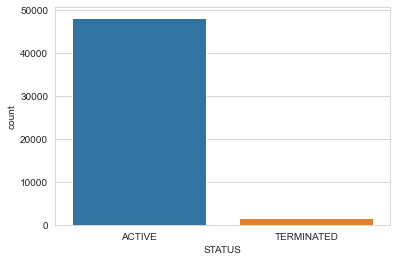

In [9]:
sns.set_style('whitegrid')
sns.countplot(x = 'STATUS', data = df)

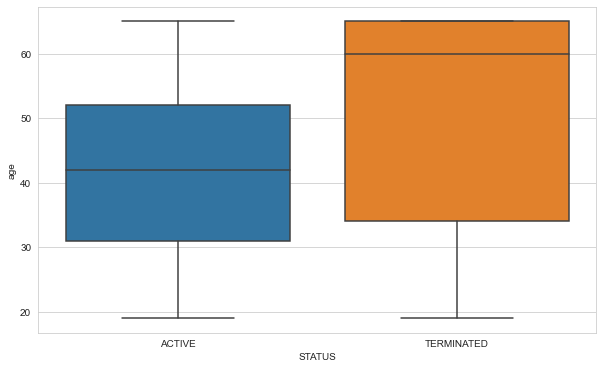

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'STATUS', y='age', data = df)

### ***As we can observe above,2014 has seen many terminations compared to other periods***

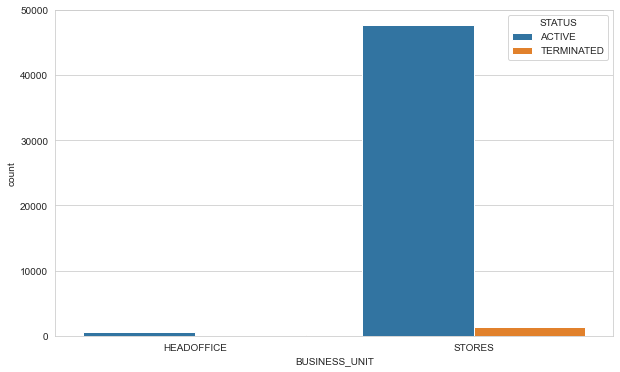

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(hue= 'STATUS', data = df, x = 'BUSINESS_UNIT')

We can observe,almost all the termination are from STORES business unit

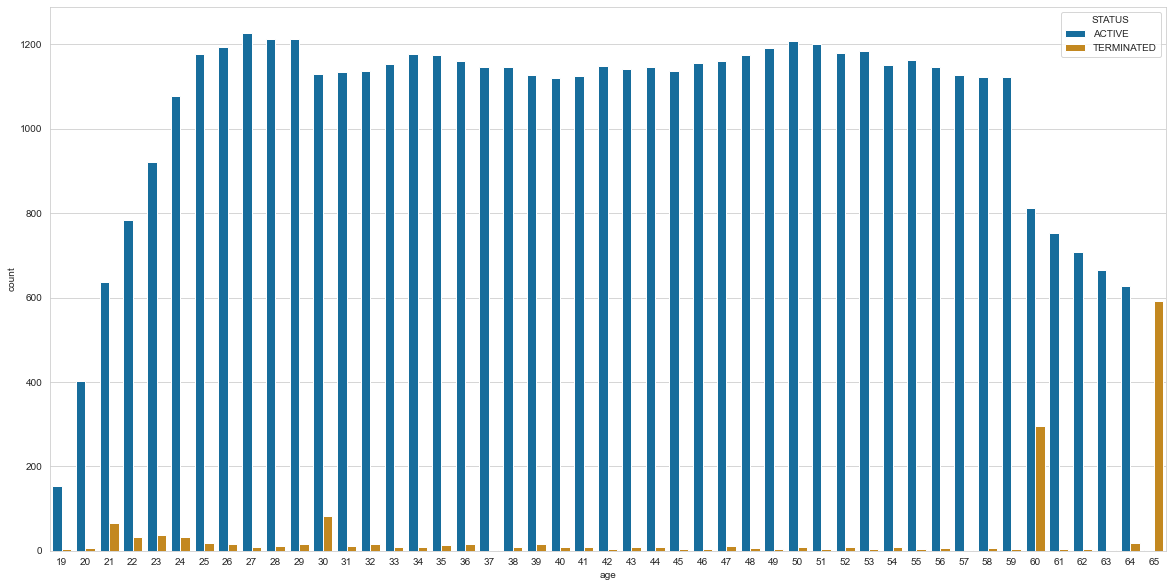

In [12]:
plt.subplots(figsize=(20,10))
sns.countplot(x= 'age',hue = 'STATUS',data = df,palette='colorblind')

## Termination are more after the 60 years of age

In [13]:
df.corr()

,age,length_of_service,store_name,STATUS_YEAR
age,1.000000,0.909430,-0.004068,-0.039738
length_of_service,0.909430,1.000000,0.011724,0.237022
store_name,-0.004068,0.011724,1.000000,0.008656
STATUS_YEAR,-0.039738,0.237022,0.008656,1.000000


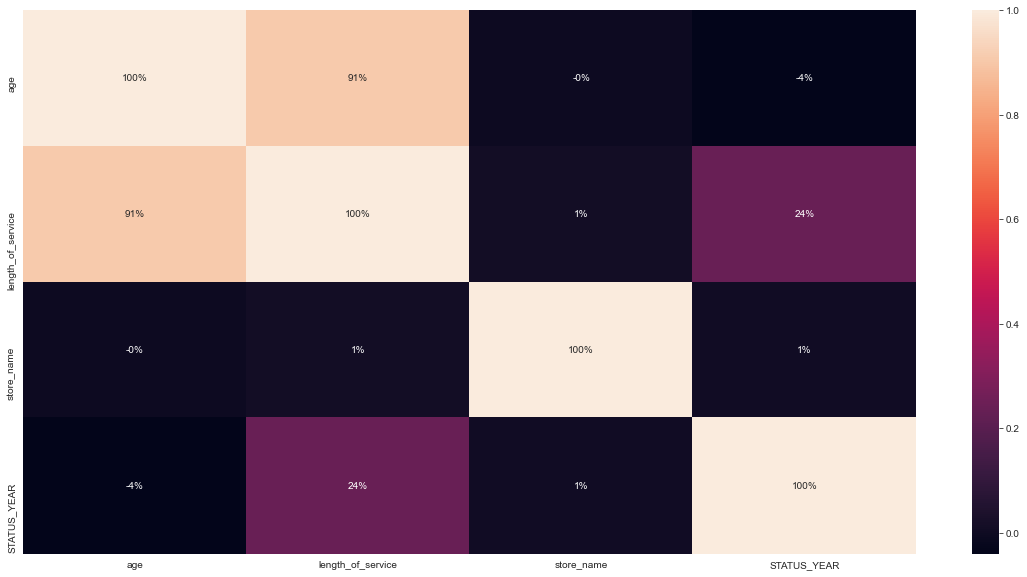

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

## Length of Service and Age are highly correlated

In [15]:
df.columns

Index(['age', 'length_of_service', 'city_name', 'department_name', 'job_title',
       'store_name', 'gender_short', 'termreason_desc', 'termtype_desc',
       'STATUS_YEAR', 'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

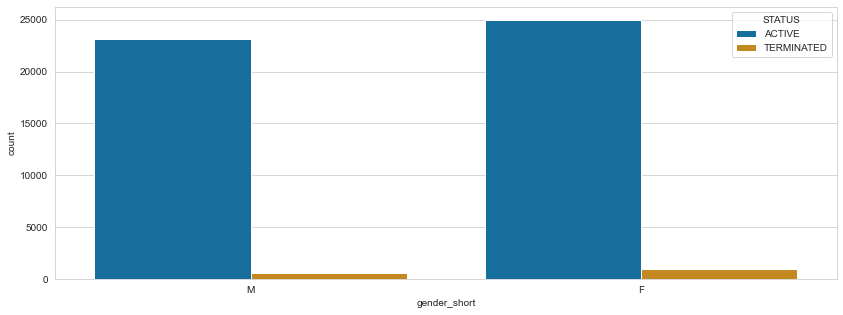

In [16]:
plt.subplots(figsize=(14,5))
sns.countplot(x= 'gender_short',hue = 'STATUS',data = df,palette='colorblind')

## Female gender has more active and terminated status

In [17]:
df.job_title.value_counts()

Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
Baker                              8096
Cashier                            6816
Shelf Stocker                      5622
Customer Service Manager            306
Processed Foods Manager             289
Meats Manager                       285
Bakery Manager                      285
Produce Manager                     278
Store Manager                       271
Recruiter                            62
HRIS Analyst                         55
Accounting Clerk                     50
Benefits Admin                       35
Labor Relations Analyst              30
Accounts Receiveable Clerk           30
Trainer                              26
Accounts Payable Clerk               25
Systems Analyst                      20
Auditor                              20
Compensation Analyst                 20
Investment Analyst                   20
Corporate Lawyer                     17


##

1. Meat Cutter 
2. Dairy Person                      
3. Produce Clerk  
4. Baker
5. Cashier   

Above are the top 5 job titles ##

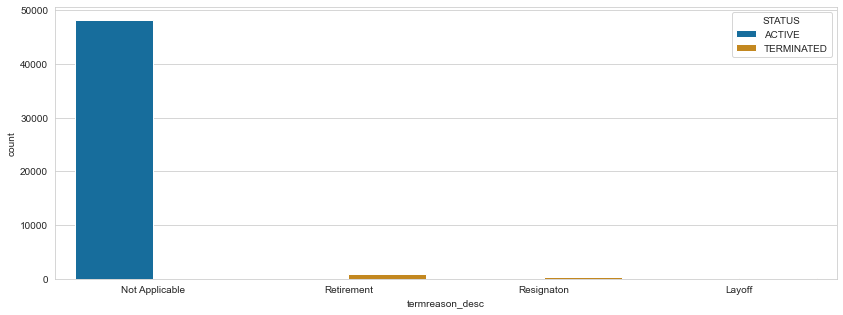

In [18]:
plt.subplots(figsize=(14,5))
sns.countplot(x= 'termreason_desc',hue = 'STATUS',data = df,palette='colorblind')

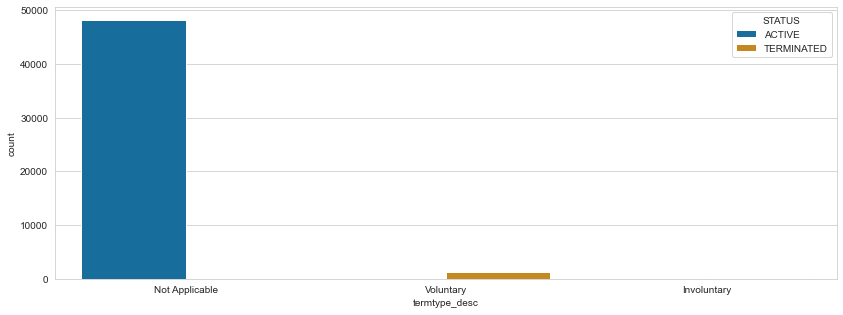

In [19]:
plt.subplots(figsize=(14,5))
sns.countplot(x= 'termtype_desc',hue = 'STATUS',data = df,palette='colorblind')

In [20]:
df=pd.get_dummies(columns=['STATUS'],data=df,drop_first=True)
df

,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,BUSINESS_UNIT,STATUS_TERMINATED
0,52,17,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2006,HEADOFFICE,0
1,53,18,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2007,HEADOFFICE,0
2,54,19,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2008,HEADOFFICE,0
3,55,20,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2009,HEADOFFICE,0
4,56,21,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2010,HEADOFFICE,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49648,21,2,Valemount,Dairy,Dairy Person,34,M,Layoff,Involuntary,2015,STORES,1
49649,19,0,Vancouver,Customer Service,Cashier,44,F,Resignaton,Voluntary,2013,STORES,1
49650,21,2,White Rock,Customer Service,Cashier,39,F,Layoff,Involuntary,2015,STORES,1
49651,19,0,Kelowna,Customer Service,Cashier,16,F,Resignaton,Voluntary,2013,STORES,1


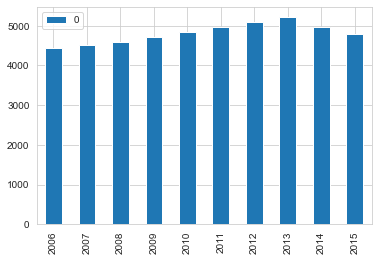

In [21]:
from collections import Counter
out_of_co = df[df.STATUS_TERMINATED == 0]
term_per_year = Counter(out_of_co.STATUS_YEAR)
term_per_year_df = pd.DataFrame.from_dict(term_per_year, orient='index')
term_per_year_df = term_per_year_df.sort_index()
term_per_year_df.plot(kind='bar')

In [22]:
df.job_title.value_counts()

Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
Baker                              8096
Cashier                            6816
Shelf Stocker                      5622
Customer Service Manager            306
Processed Foods Manager             289
Meats Manager                       285
Bakery Manager                      285
Produce Manager                     278
Store Manager                       271
Recruiter                            62
HRIS Analyst                         55
Accounting Clerk                     50
Benefits Admin                       35
Labor Relations Analyst              30
Accounts Receiveable Clerk           30
Trainer                              26
Accounts Payable Clerk               25
Systems Analyst                      20
Auditor                              20
Compensation Analyst                 20
Investment Analyst                   20
Corporate Lawyer                     17


### As we can see there are many sub categories in job_title lets bin them under somee category and use accordingly

In [23]:
##Job_title is the most tedious column, as it has many distinct entries, we will generalize like jobs into categories, 
## and then turn them into numerical values

board = ['VP Stores', 'Director, Recruitment', 'VP Human Resources', 'VP Finance',
         'Director, Accounts Receivable', 'Director, Accounting',
         'Director, Employee Records', 'Director, Accounts Payable',
         'Director, HR Technology', 'Director, Investments',
         'Director, Labor Relations', 'Director, Audit', 'Director, Training',
         'Director, Compensation']

executive = ['Exec Assistant, Finance', 'Exec Assistant, Legal Counsel',
             'CHief Information Officer', 'CEO', 'Exec Assistant, Human Resources',
             'Exec Assistant, VP Stores']

manager = ['Customer Service Manager', 'Processed Foods Manager', 'Meats Manager',
           'Bakery Manager', 'Produce Manager', 'Store Manager', 'Trainer', 'Dairy Manager']

employee = ['Meat Cutter', 'Dairy Person', 'Produce Clerk', 'Baker', 'Cashier',
            'Shelf Stocker', 'Recruiter', 'HRIS Analyst', 'Accounting Clerk',
            'Benefits Admin', 'Labor Relations Analyst', 'Accounts Receiveable Clerk',
            'Accounts Payable Clerk', 'Auditor', 'Compensation Analyst',
            'Investment Analyst', 'Systems Analyst', 'Corporate Lawyer', 'Legal Counsel']

def changeTitle(row):
    if row in board:
        return 'board'
    elif row in executive:
        return 'executive'
    elif row in manager:
        return 'manager'
    else:
        return 'employee'
    
df['job_title'] = df['job_title'].apply(changeTitle)

df.head()

,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,BUSINESS_UNIT,STATUS_TERMINATED
0,52,17,Vancouver,Executive,executive,35,M,Not Applicable,Not Applicable,2006,HEADOFFICE,0
1,53,18,Vancouver,Executive,executive,35,M,Not Applicable,Not Applicable,2007,HEADOFFICE,0
2,54,19,Vancouver,Executive,executive,35,M,Not Applicable,Not Applicable,2008,HEADOFFICE,0
3,55,20,Vancouver,Executive,executive,35,M,Not Applicable,Not Applicable,2009,HEADOFFICE,0
4,56,21,Vancouver,Executive,executive,35,M,Not Applicable,Not Applicable,2010,HEADOFFICE,0


In [24]:
df=pd.get_dummies(columns=['job_title'],data=df,drop_first=True)
df.head()

,age,length_of_service,city_name,department_name,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,BUSINESS_UNIT,STATUS_TERMINATED,job_title_employee,job_title_executive,job_title_manager
0,52,17,Vancouver,Executive,35,M,Not Applicable,Not Applicable,2006,HEADOFFICE,0,0,1,0
1,53,18,Vancouver,Executive,35,M,Not Applicable,Not Applicable,2007,HEADOFFICE,0,0,1,0
2,54,19,Vancouver,Executive,35,M,Not Applicable,Not Applicable,2008,HEADOFFICE,0,0,1,0
3,55,20,Vancouver,Executive,35,M,Not Applicable,Not Applicable,2009,HEADOFFICE,0,0,1,0
4,56,21,Vancouver,Executive,35,M,Not Applicable,Not Applicable,2010,HEADOFFICE,0,0,1,0


In [25]:
df.STATUS_YEAR.unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
      dtype=int64)

In [26]:
df.city_name.unique()

array(['Vancouver', 'Terrace', 'Nanaimo', 'Nelson', 'Kelowna', 'Victoria',
       'Kamloops', 'Fort St John', 'Surrey', 'Vernon', 'Quesnel',
       'Chilliwack', 'Dawson Creek', 'Squamish', 'New Westminster',
       'Port Coquitlam', 'Cortes Island', 'Burnaby', 'Bella Bella',
       'Cranbrook', 'Williams Lake', 'Trail', 'Prince George', 'Richmond',
       'Grand Forks', 'West Vancouver', 'Abbotsford', 'Aldergrove',
       'Langley', 'North Vancouver', 'White Rock', 'New Westminister',
       'Fort Nelson', 'Haney', 'Valemount', 'Ocean Falls', 'Princeton',
       'Dease Lake', 'Pitt Meadows', 'Blue River'], dtype=object)

### As we can see the list of city we will segrregate thme as RURAL,URBAN AND OTHER

In [27]:
city_population = {'Vancouver':2313328,
                 'Victoria':344615,
                 'Nanaimo':146574,
                 'New Westminster':65976,
                 'Kelowna':179839,
                 'Burnaby':223218,
                 'Kamloops':85678,
                 'Prince George':71974,
                 'Cranbrook':19319,
                 'Surrey':468251,
                 'Richmond':190473,
                 'Terrace':11486,
                 'Chilliwack':77936,
                 'Trail':7681,
                 'Langley':25081,
                 'Vernon':38180,
                 'Squamish':17479,
                 'Quesnel':10007,
                 'Abbotsford':133497,
                 'North Vancouver':48196,
                 'Fort St John':18609,
                 'Williams Lake':10832,
                 'West Vancouver':42694,
                 'Port Coquitlam':55985,
                 'Aldergrove':12083,
                 'Fort Nelson':3561,
                 'Nelson':10230,
                 'New Westminister':65976,
                 'Grand Forks':3985,
                 'White Rock':19339,
                 'Haney':76052,
                 'Princeton':2724,
                 'Dawson Creek':11583,
                 'Bella Bella':1095,
                 'Ocean Falls':129,
                 'Pitt Meadows':17736,
                 'Cortes Island':1007,
                 'Valemount':1020,
                 'Dease Lake':58,
                 'Blue River':215}

In [28]:
##Make a copy of city names
df['Population'] = df['city_name']

# Map from city name to population
df['Population'] = df.Population.map(city_population)

# Make a new column for population category
df['Population_category'] = df.Population

# Categorise according to population size
# >= 100,000 is Urban
# 10,000 to 99,999 is Rural
# < 10,000 is Other
# Guidance from Australian Institute of Health and Welfare

urban_ix = (df['Population'] >= 100000)
rural_ix = ((df['Population'] < 100000) & (df['Population'] >= 10000))
other_ix = (df['Population'] < 10000)
df.loc[urban_ix, 'Population_category'] = 'Urban'
df.loc[rural_ix, 'Population_category'] = 'Rural'
df.loc[other_ix, 'Population_category'] = 'Other'

df['Population_category'] = df['Population_category'].map({'Urban' : 0, 'Rural' : 1, 'Other' : 2})

df.Population_category.value_counts()

0    28194
1    19542
2     1917
Name: Population_category, dtype: int64

In [29]:
df.head(2)

,age,length_of_service,city_name,department_name,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,BUSINESS_UNIT,STATUS_TERMINATED,job_title_employee,job_title_executive,job_title_manager,Population,Population_category
0,52,17,Vancouver,Executive,35,M,Not Applicable,Not Applicable,2006,HEADOFFICE,0,0,1,0,2313328,0
1,53,18,Vancouver,Executive,35,M,Not Applicable,Not Applicable,2007,HEADOFFICE,0,0,1,0,2313328,0


In [30]:
df['gender_short'] = df['gender_short'].map({'M': 1, 'F': 0})
df['BUSINESS_UNIT'] = df['BUSINESS_UNIT'].map({'STORES': 0, 'HEADOFFICE' :1})

In [31]:
df.head()

,age,length_of_service,city_name,department_name,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,BUSINESS_UNIT,STATUS_TERMINATED,job_title_employee,job_title_executive,job_title_manager,Population,Population_category
0,52,17,Vancouver,Executive,35,1,Not Applicable,Not Applicable,2006,1,0,0,1,0,2313328,0
1,53,18,Vancouver,Executive,35,1,Not Applicable,Not Applicable,2007,1,0,0,1,0,2313328,0
2,54,19,Vancouver,Executive,35,1,Not Applicable,Not Applicable,2008,1,0,0,1,0,2313328,0
3,55,20,Vancouver,Executive,35,1,Not Applicable,Not Applicable,2009,1,0,0,1,0,2313328,0
4,56,21,Vancouver,Executive,35,1,Not Applicable,Not Applicable,2010,1,0,0,1,0,2313328,0


### Observations
1. Nobody was terminated if they were at the executive level, or higher.
2. Usually Terminations where done above the age of 60
3. No major difference between male and female termination,however female are more in both
4. Executives and board members live in the Urban areas

In [32]:
df.termreason_desc.unique()

array(['Not Applicable', 'Retirement', 'Resignaton', 'Layoff'],
      dtype=object)

In [33]:
df.termtype_desc.unique()

array(['Not Applicable', 'Voluntary', 'Involuntary'], dtype=object)

In [34]:
df.department_name.unique()

array(['Executive', 'Store Management', 'Meats', 'Recruitment',
       'Training', 'Labor Relations', 'HR Technology', 'Employee Records',
       'Compensation', 'Legal', 'Produce', 'Accounts Receiveable',
       'Bakery', 'Information Technology', 'Accounts Payable', 'Audit',
       'Accounting', 'Investment', 'Dairy', 'Processed Foods',
       'Customer Service'], dtype=object)

In [35]:
df = df.drop(columns = [ 'store_name','BUSINESS_UNIT', 'city_name','department_name'])

In [36]:
df['termtype_desc'] = df['termtype_desc'].map({'Not Applicable': 0, 'Voluntary' :1,'Involuntary':2})
df['termreason_desc'] = df['termreason_desc'].map({'Not Applicable': 0, 'Retirement' :1,'Resignaton':2,'Layoff':3})

In [37]:
df.head(2)

,age,length_of_service,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS_TERMINATED,job_title_employee,job_title_executive,job_title_manager,Population,Population_category
0,52,17,1,0,0,2006,0,0,1,0,2313328,0
1,53,18,1,0,0,2007,0,0,1,0,2313328,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  49653 non-null  int64
 1   length_of_service    49653 non-null  int64
 2   gender_short         49653 non-null  int64
 3   termreason_desc      49653 non-null  int64
 4   termtype_desc        49653 non-null  int64
 5   STATUS_YEAR          49653 non-null  int64
 6   STATUS_TERMINATED    49653 non-null  uint8
 7   job_title_employee   49653 non-null  uint8
 8   job_title_executive  49653 non-null  uint8
 9   job_title_manager    49653 non-null  uint8
 10  Population           49653 non-null  int64
 11  Population_category  49653 non-null  int64
dtypes: int64(8), uint8(4)
memory usage: 3.2 MB


In [39]:
df.termreason_desc.isna().sum()

0

In [53]:
df.STATUS_TERMINATED.value_counts()

0    48168
1     1485
Name: STATUS_TERMINATED, dtype: int64

### As we can observe classes above,there is huge imbalancement in the classes,Lets handle imalanced Data 

In [62]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
os = RandomOverSampler(sampling_strategy=0.75)

In [63]:
X=df.drop('STATUS_TERMINATED',axis=1)
y=df.STATUS_TERMINATED

In [64]:
# Implementing Oversampling for Handling Imbalanced 
X_res,y_res=os.fit_resample(X,y)

In [65]:
X_res.shape,y_res.shape

((84294, 11), (84294,))

In [66]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 48168, 1: 1485})
Resampled dataset shape Counter({0: 48168, 1: 36126})


# Building Models 

## ***1. LOGISTIC REGRESSION MODEL***

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [80]:
# 30% of the data will be used for testing
x_train, x_test, y_train, y_test= train_test_split(X_res,y_res, test_size=0.25, random_state=0)

In [81]:
logm=LogisticRegression()

In [101]:
model1=logm.fit(x_train,y_train)

## ***Predicting the Results***

In [102]:
y_pred=model1.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=uint8)

## ***Evaluation of model performance***

In [103]:
# Classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [104]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.74      0.77      0.76     11992
           1       0.68      0.64      0.66      9082

    accuracy                           0.72     21074
   macro avg       0.71      0.71      0.71     21074
weighted avg       0.71      0.72      0.72     21074



In [105]:
print(confusion_matrix(y_test,y_pred))

[[9246 2746]
 [3236 5846]]


## ***K-Fold Cross Validation***

In [107]:
from sklearn.model_selection import cross_val_score
lg_Kfold_accu = cross_val_score(estimator = model1,X = x_train, y = y_train, cv = 10)
lg_Kfold_accu=lg_Kfold_accu.mean()
print("Accuracy: {:.2f} %".format(lg_Kfold_accu*100))

Accuracy: 69.31 %


## ***Executing Hyper Paramter Tuning***

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
parameters = [{'penalty': [11,12,'elasticnet'], 'C': [1,10,50,100,200]},
              {'tol': [0.001,0.0001,0.00001]}]
lg_grid_search = GridSearchCV(estimator = model1,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
lg_grid_search = lg_grid_search.fit(x_train, y_train)
lg_best_accuracy = lg_grid_search.best_score_
lg_best_parameters = lg_grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(lg_best_accuracy*100))
print("Best Parameters:", lg_best_parameters)

Best Accuracy: 69.31 %
Best Parameters: {'tol': 0.001}


In [90]:
parameters = [{'tol': [0.01,0.001,0.002,0.003]}]
lg_grid_search = GridSearchCV(estimator = model1,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
lg_grid_search = lg_grid_search.fit(x_train, y_train)
lg_best_accuracy = lg_grid_search.best_score_
lg_best_parameters = lg_grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(lg_best_accuracy*100))
print("Best Parameters:", lg_best_parameters)

Best Accuracy: 69.31 %
Best Parameters: {'tol': 0.01}


### ***We have achieved a accuracy score of 69.30 % under logistic regression ***